In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
import os
import joblib

(1190, 12)


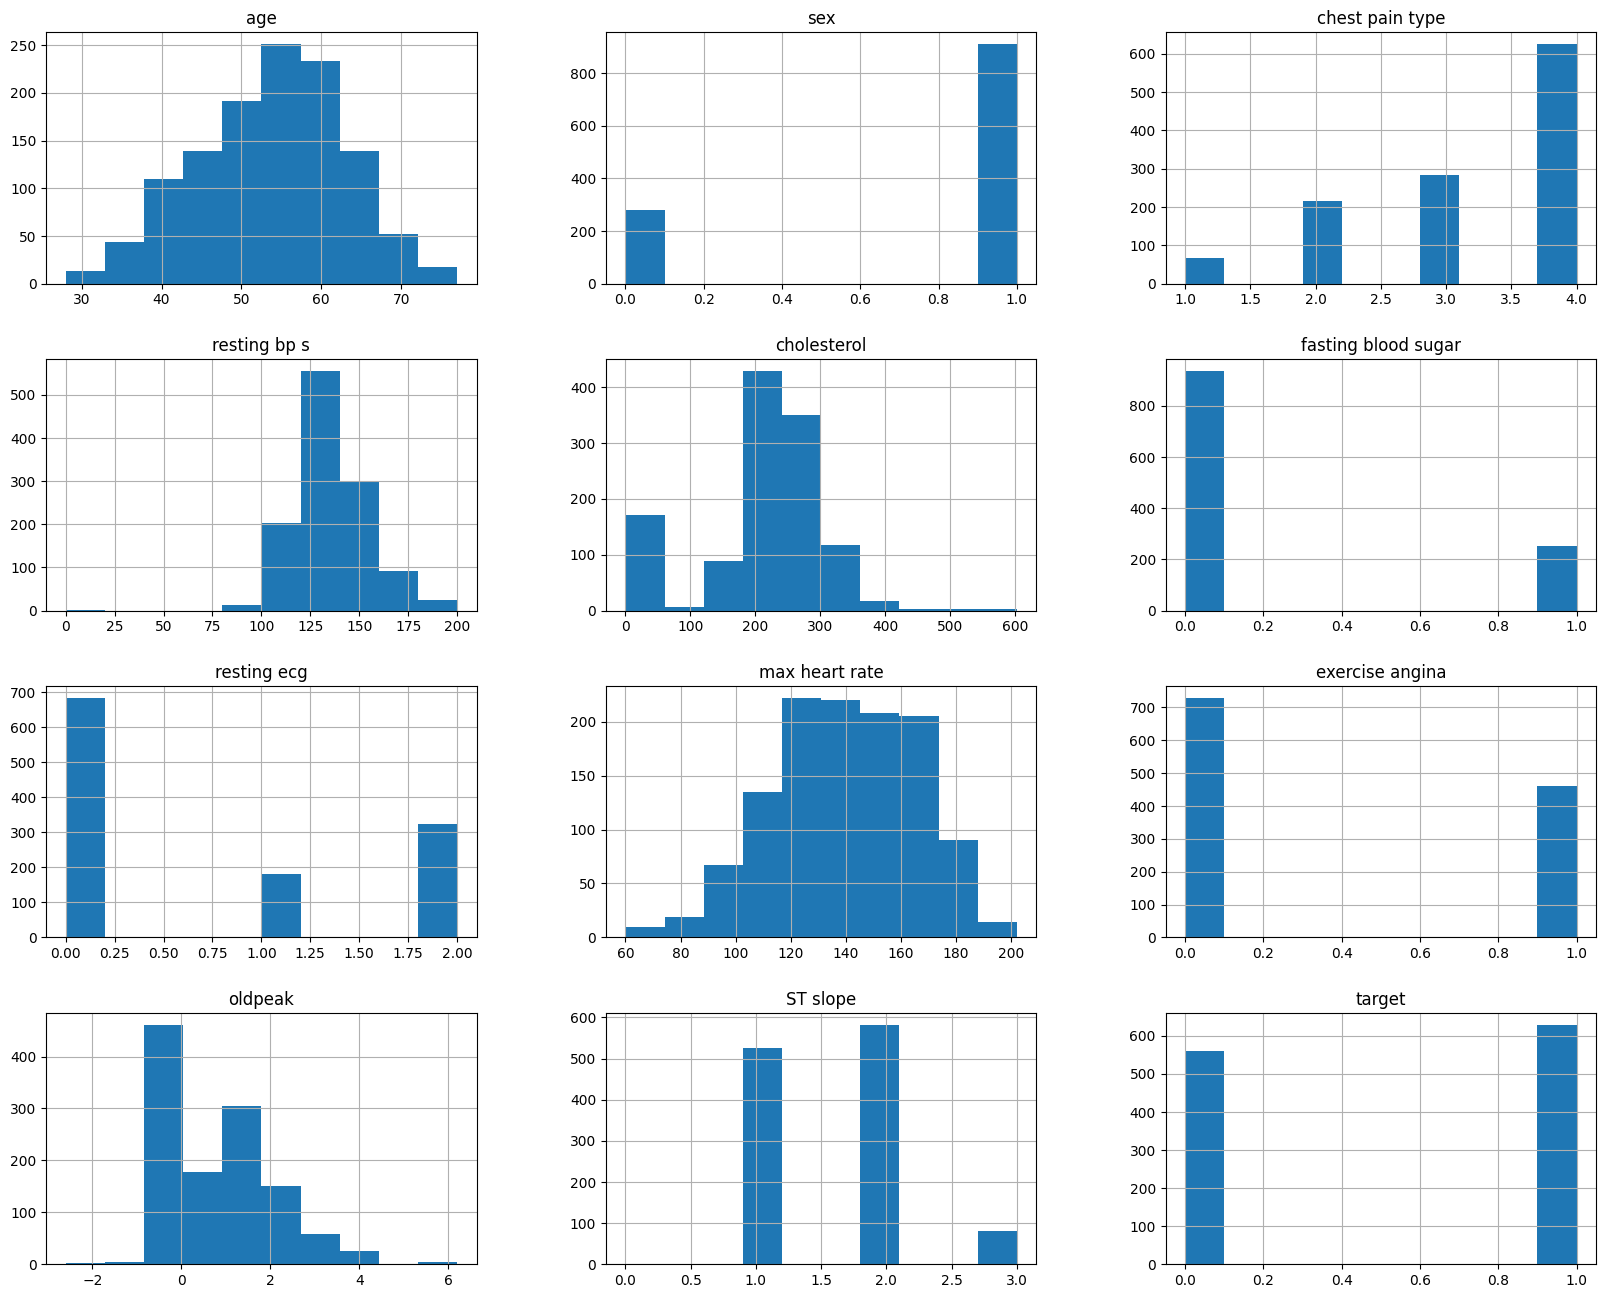

In [2]:


# Suppress warnings
warnings.filterwarnings("ignore")

# تحميل البيانات
patient_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

# استكشاف سريع
print(patient_data.shape)
patient_data.hist(figsize=(20, 16))
plt.show()



In [3]:
print(patient_data.isnull().sum())
print(patient_data.duplicated().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
272


In [4]:



# تقسيم البيانات إلى ميزات وهدف
X_normal = patient_data.drop("target", axis=1)
Y = patient_data["target"]


In [21]:
# تطبيع الميزات

Scaler = StandardScaler()
X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns=X_normal.columns)
print(X.head())

        age       sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728  0.555995        -1.318351      0.427328     0.775674   
1 -0.504600 -1.798576        -0.248932      1.516587    -0.299512   
2 -1.787437  0.555995        -1.318351     -0.117301     0.716489   
3 -0.611503 -1.798576         0.820487      0.318402     0.035867   
4  0.029915  0.555995        -0.248932      0.971958    -0.151550   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0            -0.520929    -0.802672        1.265039        -0.795219   
1            -0.520929    -0.802672        0.637758        -0.795219   
2            -0.520929     0.346762       -1.636136        -0.795219   
3            -0.520929    -0.802672       -1.244085         1.257515   
4            -0.520929    -0.802672       -0.695214        -0.795219   

    oldpeak  ST slope  
0 -0.849792 -1.023217  
1  0.071119  0.615583  
2 -0.849792 -1.023217  
3  0.531575  0.615583  
4 -0.849792 -1.023217  


In [6]:

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:



# 1. Logistic Regression (بدون GridSearch)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, Y_train)
logreg_predict = logreg_model.predict(X_test)
logreg_acc = accuracy_score(Y_test, logreg_predict)
print("Accuracy of Logistic Regression:", "{:.2f}%".format(logreg_acc * 100))
print("\nClassification Report - Logistic Regression:")
print(classification_report(Y_test, logreg_predict))

Accuracy of Logistic Regression: 86.13%

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



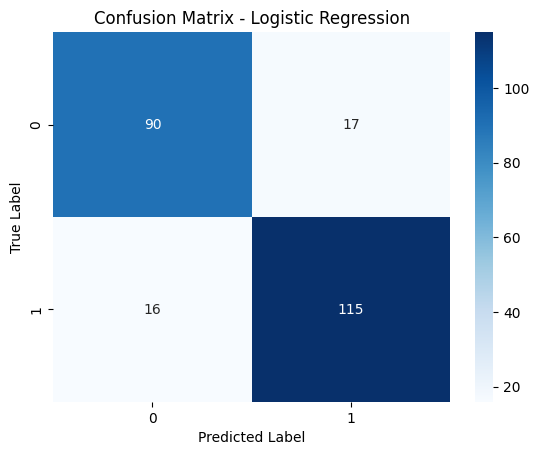

In [8]:



logreg_cm = confusion_matrix(Y_test, logreg_predict)
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, Y_train)
dt_predict = dt_model.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_predict)
print("Accuracy of Decision Tree:", "{:.2f}%".format(dt_acc * 100))
print("\nClassification Report - Decision Tree:")
print(classification_report(Y_test, dt_predict))

Accuracy of Decision Tree: 89.08%

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.93      0.86      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



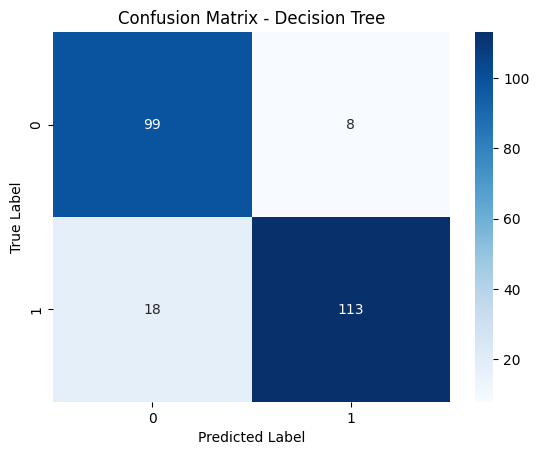

In [10]:



dt_cm = confusion_matrix(Y_test, dt_predict)
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [11]:
# 3. Random Forest 
rf_model = RandomForestClassifier(random_state=12)
rf_model.fit(X_train, Y_train)
rf_predict = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_predict)
print("Accuracy of Random Forest:", "{:.2f}%".format(rf_acc * 100))
print("\nClassification Report - Random Forest:")
print(classification_report(Y_test, rf_predict))

Accuracy of Random Forest: 94.54%

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.94      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



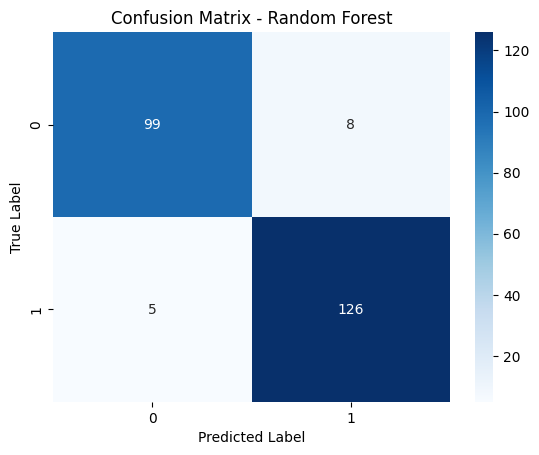

In [12]:




rf_cm = confusion_matrix(Y_test, rf_predict)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
# 4. K-Nearest Neighbors (بدون GridSearch)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_predict = knn_model.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_predict)
print("Accuracy of K-Neighbors Classifier:", "{:.2f}%".format(knn_acc * 100))
print("\nClassification Report - KNN:")
print(classification_report(Y_test, knn_predict))

Accuracy of K-Neighbors Classifier: 88.66%

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       107
           1       0.87      0.93      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.88      0.88       238
weighted avg       0.89      0.89      0.89       238



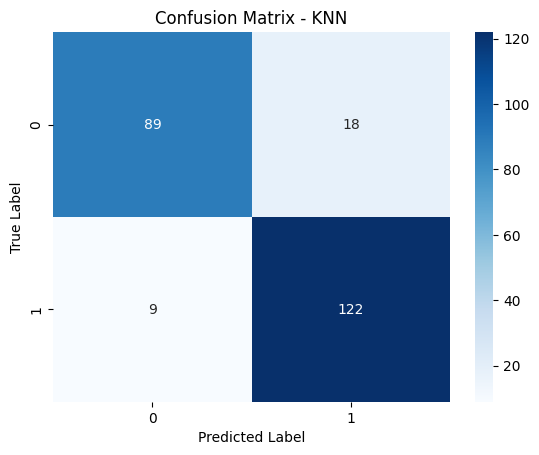

In [14]:



knn_cm = confusion_matrix(Y_test, knn_predict)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
# 5. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_predict = nb_model.predict(X_test)
nb_acc = accuracy_score(Y_test, nb_predict)
print("Accuracy of Naive Bayes:", "{:.2f}%".format(nb_acc * 100))
print("\nClassification Report - Naive Bayes:")
print(classification_report(Y_test, nb_predict))

Accuracy of Naive Bayes: 85.71%

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



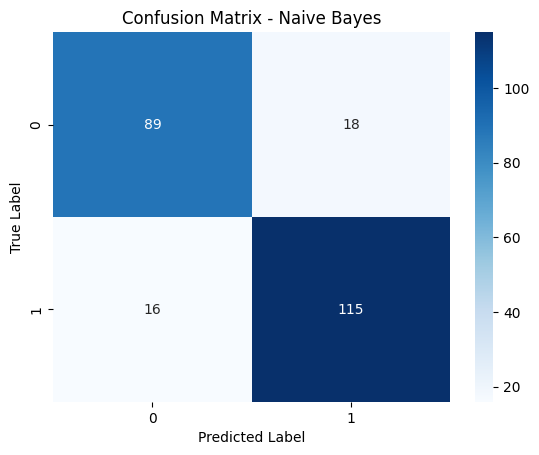

In [16]:



nb_cm = confusion_matrix(Y_test, nb_predict)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:

# مقارنة الدقة
models_accuracy = {
    "Logistic Regression": logreg_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "KNN": knn_acc,
    "Naive Bayes": nb_acc,
}

best_model_name = max(models_accuracy, key=models_accuracy.get)
best_acc = models_accuracy[best_model_name]

comparison_df = pd.DataFrame({
    "Model": models_accuracy.keys(),
    "Accuracy": ["{:.2f}%".format(v * 100) for v in models_accuracy.values()]
})
print("Comparison Table:")
print(comparison_df)
print(f"\nBest Model: {best_model_name} with accuracy {best_acc:.2%}")

Comparison Table:
                 Model Accuracy
0  Logistic Regression   86.13%
1        Decision Tree   89.08%
2        Random Forest   94.54%
3                  KNN   88.66%
4          Naive Bayes   85.71%

Best Model: Random Forest with accuracy 94.54%


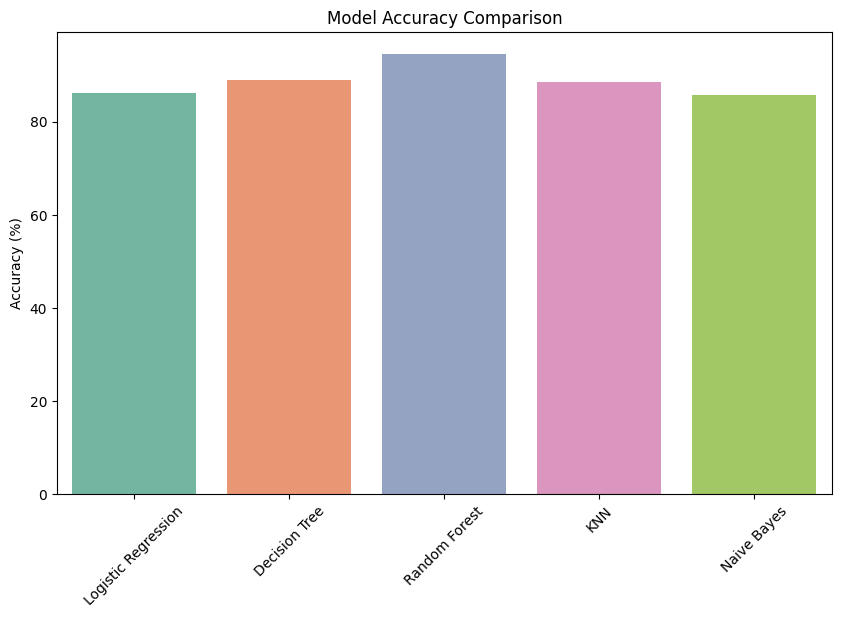

In [18]:
# رسم بياني للمقارنة
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=[v*100 for v in models_accuracy.values()], palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()

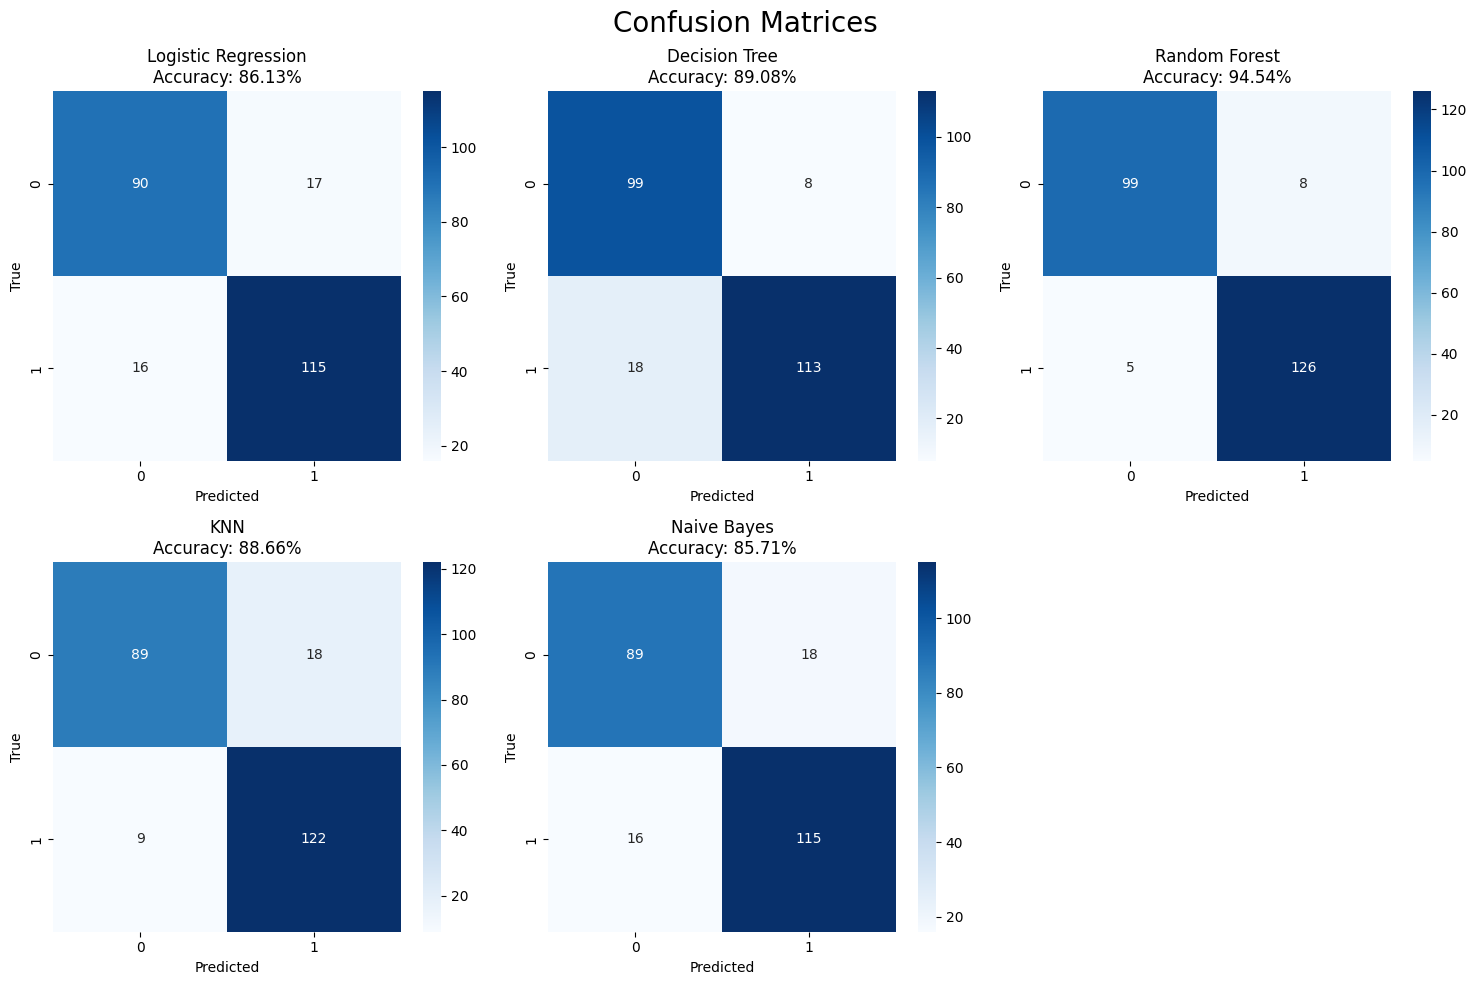

In [19]:



# مصفوفات الارتباك المجمعة
classifiers = [
    ("Logistic Regression", logreg_cm, logreg_acc),
    ("Decision Tree", dt_cm, dt_acc),
    ("Random Forest", rf_cm, rf_acc),
    ("KNN", knn_cm, knn_acc),
    ("Naive Bayes", nb_cm, nb_acc),
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Confusion Matrices", fontsize=20)
for idx, (name, cm, acc) in enumerate(classifiers):
    ax = axes[idx // 3, idx % 3]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name}\nAccuracy: {acc*100:.2f}%")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
if len(classifiers) < 6:
    fig.delaxes(axes[1, 2])  # حذف المحور الزائد
plt.tight_layout()
plt.show()

In [22]:
# إنشاء مجلد للحفظ إذا لم يكن موجودًا
os.makedirs("model", exist_ok=True)

# حفظ النموذج والـ Scaler
joblib.dump(rf_model, "model/random_forest_heart_model.pkl")
joblib.dump(Scaler, "model/scaler.pkl")

['model/scaler.pkl']